In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import gym

In [2]:
env = gym.make('FrozenLake-v0', is_slippery=True)

In [3]:
print("Action space = ", env.action_space)
print("Observation space = ", env.observation_space)

Action space =  Discrete(4)
Observation space =  Discrete(16)


In [4]:
actionsDict = {}
actionsDict[0] = "  L  "
actionsDict[1] = "  D  "
actionsDict[2] = "  R  "
actionsDict[3] = "  U  "

actionsDictInv = {}
actionsDictInv["L"] = 0
actionsDictInv["D"] = 1
actionsDictInv["R"] = 2
actionsDictInv["U"] = 3

In [5]:
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [6]:
optimalPolicy = ["L/D/R","  U  ","  U  ","  U  ",
                 "  L  ","  -  "," L/R ","  -  ",
                 "  U  ","  D  ","  L  ","  -  ",
                 "  -  ","  R  ","  D  ","  !  "]
    
print("Optimal policy:")
idxs = [0,4,8,12]
for idx in idxs:
    print(optimalPolicy[idx+0], optimalPolicy[idx+1], 
          optimalPolicy[idx+2], optimalPolicy[idx+3])

Optimal policy:
L/D/R  U   U   U 
  L    -  L/R  - 
  U    D   L   - 
  -    R   D   ! 


In [7]:
def action_epsilon_greedy(q, s, epsilon=0.05):
    if np.random.rand() > epsilon:
        return np.argmax(q[s])
    return np.random.randint(4)

In [8]:
def greedy_policy(q, s):
    return np.argmax(q[s])

In [9]:
def average_performance(policy_fct, q):
    acc_returns = 0.
    n = 500
    for i in range(n):
        done = False
        s = env.reset()
        while not done:
            a = policy_fct(q, s)
            s, reward, done, info = env.step(a)
            acc_returns += reward
    return acc_returns/n

In [10]:
q = np.ones((16, 4))
# Set q(terminal,*) equal to 0
q[5,:] = 0.0
q[7,:] = 0.0
q[11,:] = 0.0
q[12,:] = 0.0
q[15,:] = 0.0

In [11]:
nb_episodes = 80000
STEPS = 2000
alpha = 0.01
gamma = 0.99
epsilon_expl = 0.2

q_performance = np.ndarray(nb_episodes//STEPS) 

In [12]:
# Q-Learning: Off-policy TD control algorithm
for i in range(nb_episodes):
        
    done = False
    s = env.reset()
    while not done:
        a = action_epsilon_greedy(q, s, epsilon_expl) # behaviour policy 
        new_s, reward, done, info = env.step(a)
        a_max = np.argmax(q[new_s]) # estimation policy 
        q[s, a] = q[s, a] + alpha * (reward + gamma * q[new_s, a_max] - q[s, a])
        s = new_s
        
    # for plotting the performance    
    if i%STEPS == 0:
        q_performance[i//STEPS] = average_performance(greedy_policy, q)

Text(0.5, 1.0, 'Learning progress for Q-Learning')

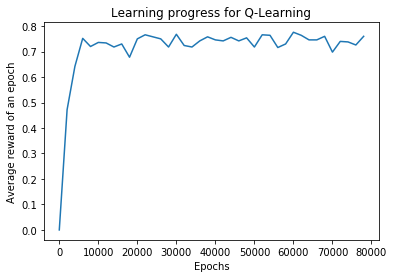

In [13]:
plt.plot(STEPS * np.arange(nb_episodes//STEPS), q_performance)
plt.xlabel("Epochs")
plt.ylabel("Average reward of an epoch")
plt.title("Learning progress for Q-Learning")

In [14]:
greedyPolicyAvgPerf = average_performance(greedy_policy, q=q)
print("Greedy policy Q-learning performance =", greedyPolicyAvgPerf) 

Greedy policy Q-learning performance = 0.708


In [15]:
q = np.round(q,3)
print("(A,S) Value function =", q.shape)
print("First row")
print(q[0:4,:])
print("Second row")
print(q[4:8,:])
print("Third row")
print(q[8:12,:])
print("Fourth row")
print(q[12:16,:])

(A,S) Value function = (16, 4)
First row
[[0.543 0.521 0.516 0.515]
 [0.319 0.355 0.322 0.493]
 [0.432 0.431 0.425 0.461]
 [0.32  0.298 0.296 0.447]]
Second row
[[0.559 0.392 0.396 0.393]
 [0.    0.    0.    0.   ]
 [0.296 0.224 0.327 0.145]
 [0.    0.    0.    0.   ]]
Third row
[[0.337 0.366 0.42  0.595]
 [0.484 0.639 0.433 0.415]
 [0.599 0.511 0.342 0.336]
 [0.    0.    0.    0.   ]]
Fourth row
[[0.    0.    0.    0.   ]
 [0.46  0.53  0.749 0.525]
 [0.711 0.865 0.802 0.799]
 [0.    0.    0.    0.   ]]


In [16]:
policyFound = [actionsDict[np.argmax(q[0,:])],actionsDict[np.argmax(q[1,:])],actionsDict[np.argmax(q[2,:])],actionsDict[np.argmax(q[3,:])],
               actionsDict[np.argmax(q[4,:])],"  -  ",actionsDict[np.argmax(q[6,:])],"  -  ",
               actionsDict[np.argmax(q[8,:])],actionsDict[np.argmax(q[9,:])],actionsDict[np.argmax(q[10,:])],"  -  ",
               "  -  ",actionsDict[np.argmax(q[13,:])],actionsDict[np.argmax(q[14,:])],"  !  "]
print("Greedy policy found:")
idxs = [0,4,8,12]
for idx in idxs:
    print(policyFound[idx+0], policyFound[idx+1], 
          policyFound[idx+2], policyFound[idx+3])

print(" ")

print("Optimal policy:")
idxs = [0,4,8,12]
for idx in idxs:
    print(optimalPolicy[idx+0], optimalPolicy[idx+1], 
          optimalPolicy[idx+2], optimalPolicy[idx+3])

Greedy policy found:
  L     U     U     U  
  L     -     R     -  
  U     D     L     -  
  -     R     D     !  
 
Optimal policy:
L/D/R  U   U   U 
  L    -  L/R  - 
  U    D   L   - 
  -    R   D   ! 
